In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import filters
from scipy import signal as sg
import sys
sys.path.append("/home/tintin/rongheng/cv/")
from imtools import load_img, show_img

img = load_img('oriental_pearl.jpg')

## Average / normal blur

$$ 
g_x = 
\frac{1}{9}\cdot
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}
$$

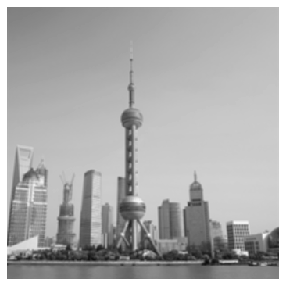

In [8]:
box = np.ones((3,3)) / 9
blurred_img = sg.convolve(img, box, "valid")
show_img(blurred_img)

## Gaussian Blur

In [10]:
def gaussian_kernel(n, std, normalised=False):
    """
    Generate a n x n matrix with a gaussian centered on it.
    The distributions standard dev is std. If normalised, its volume equals 1.
    """
    gaussian = sg.gaussian(n, std)
    gaussian2d = np.outer(gaussian, gaussian)

    if normalised:
        gaussian2d /= (2 * np.pi * (std**2))

    return gaussian2d

$$
g_{approx} =
\frac{1}{16}
\cdot
\begin{bmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{bmatrix}
$$

[[1. 2. 1.]
 [2. 4. 2.]
 [1. 2. 1.]]


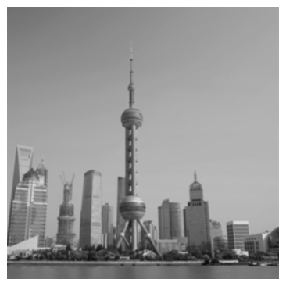

In [11]:
gauss = np.array([[1,2,1],
                  [2,4,2],
                  [1,2,1]]) / 16

gauss = gaussian_kernel(3,0.84089642, normalised=True)
print((gauss*16).round())
blurred_img = sg.convolve(gauss, img, 'valid')
show_img(blurred_img)

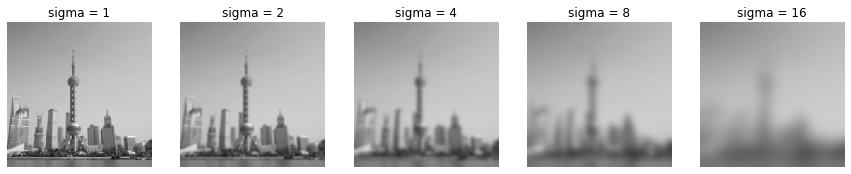

In [12]:
num_of_frames = 5

sigmas = (2**i for i in range(num_of_frames))
    
frames = range(num_of_frames)

_, frames = plt.subplots(1, num_of_frames, figsize=(15,15))
for frame in frames:
    sigma = next(sigmas)
    img_blurred = filters.gaussian_filter(img, sigma)
    frame.imshow(img_blurred, cmap='gray', vmin=0, vmax=255)
    frame.axis('off')
    frame.set_title("sigma = "  + str(sigma))


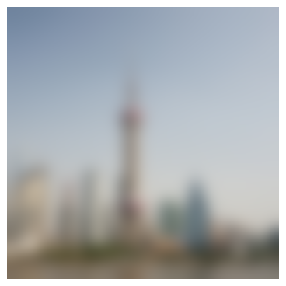

In [5]:
img = load_img('oriental_pearl.jpg', bw=False)

sigma = 10
blurred = np.zeros(img.shape)
for i in range(3):
    blurred[:,:,i] = filters.gaussian_filter(img[:,:,i],sigma)

blurred = np.uint8(blurred)

show_img(blurred)